<h1 style="color:blue;text-align:center;">Super Market Sales Analysis🏬</h1>

<h1>Reading the Data</h1>

---

## Importing Libraries 

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

## Reading CSV File

In [127]:
df = pd.read_csv('super-market.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Columns in the Dataset

In [128]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Shape of the Dataset

In [129]:
df.shape

(1000, 17)

<h1>Cleaning the Data</h1>

----

## Info of the Dataset

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Describing the Dataset

In [131]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## Dropping Invoice ID Column

In [132]:
df.drop('Invoice ID',axis='columns',inplace=True)

## Converting Date Column to Pandas Date and Time DataType

In [133]:
df['Date'] = pd.to_datetime(df['Date'])

In [134]:
df['Year'] = df['Date'].dt.year #Extracting Year from Date

In [135]:
df['Month'] = df['Date'].dt.month #Extracting Month from Date

In [136]:
df['Day'] = df['Date'].dt.day #Extracting Day from Date

## Unique Values of All Categorical Columns 

In [137]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [138]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [139]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [140]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [141]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [142]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [143]:
sorted(df['Quantity'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Total Null Values in the Dataset

In [144]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Year                       0
Month                      0
Day                        0
dtype: int64

<h1>Visualizing the Data</h1>

---

## Subplots of Distribution of Unit Price, Ratings and Gross Income

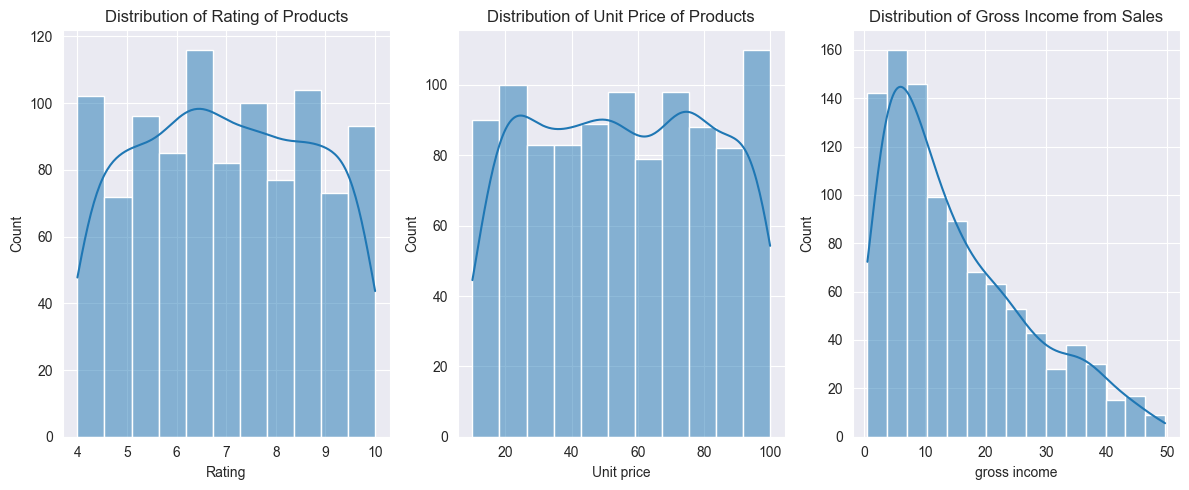

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(12,5)) 

sns.histplot(data=df['Rating'],kde=True,ax=axes[0])
axes[0].set_title('Distribution of Rating of Products')
sns.histplot(data=df['Unit price'],kde=True,ax=axes[1])
axes[1].set_title('Distribution of Unit Price of Products')
sns.histplot(data=df['gross income'],kde=True,ax=axes[2])
axes[2].set_title('Distribution of Gross Income from Sales')

fig.tight_layout()
plt.show()

### 📍 Conclusion from Above Chart

- **Above Distribution Plot shows the Distribution of Unit Price, Ratings and Gross Income.**
- **Here we can see that Ratings of Product have approximately a Bell Curve and hence follow Normal Distribution.**
- **And Unit Price of Products also have a rough Bell Shape and hence follow Normal Distribution.**
- **And Finally Gross Income from Sales have a skewed distribution towards the right and hence follow a Right Skewed Distribution.**

## Per Unit Price of Each Product Lines

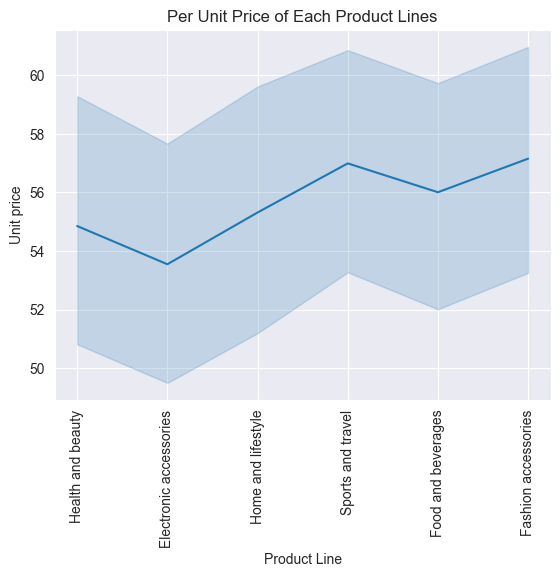

In [146]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=df['Product line'],y=df['Unit price'],data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Per Unit Price of Each Product Lines')
plt.show()
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### 📍 Conclusion from Above Chart

- **Above Line Plot shows the Unit Price of the Different Product Lines.**
- **Here we can see that Sports and Travel have the highest Unit Price and Electronic Accessories have the lowest Unit Price.**

## Count of Different Types of Customers from Different Cities

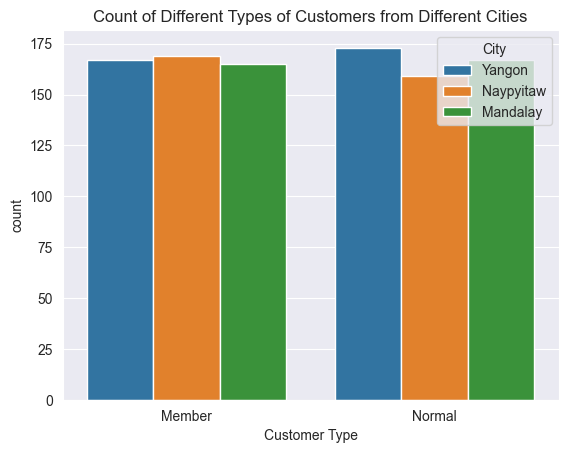

In [147]:
sns.set_style('darkgrid')
ax = sns.countplot(x=df['Customer type'],data=df,hue=df['City'])
plt.xlabel('Customer Type')
plt.title('Count of Different Types of Customers from Different Cities')
plt.legend(title='City',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Count Plot shows the Count of Different Customer Types i.e Member or Normal from Different Cities.**
- **Here we can see that Yangon has the highest Count of Normal Customers and Naypyitaw has the highest Count of Member Customers.**

## Count of Different Types of Products in Super Market

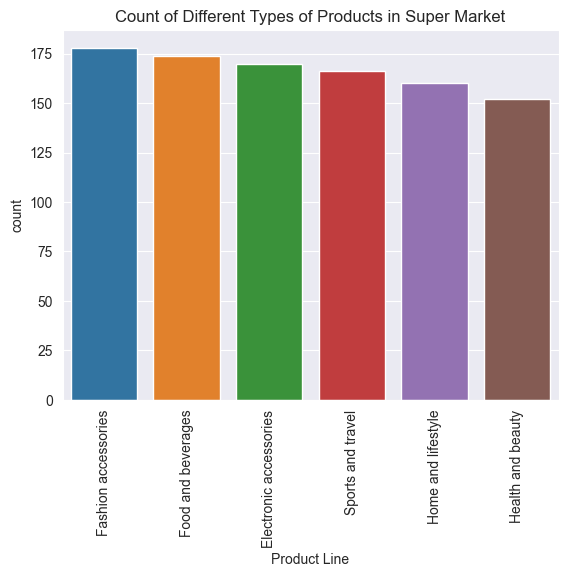

In [148]:
sns.set_style('darkgrid')
ax = sns.countplot(x=df['Product line'],data=df,order=df['Product line'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Count of Different Types of Products in Super Market')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Count Plot shows the Count of Different Product Lines available in the Super Market.**
- **Here we can see that Super Market has the highest stock of Fashion Accessories and lowest stock of Health and Beauty Products.**
- **Above Chart is arranged in Decreasing Order of Product Quantity in the Super Market.**

## Count of Different Gender Visitors at Different Branches

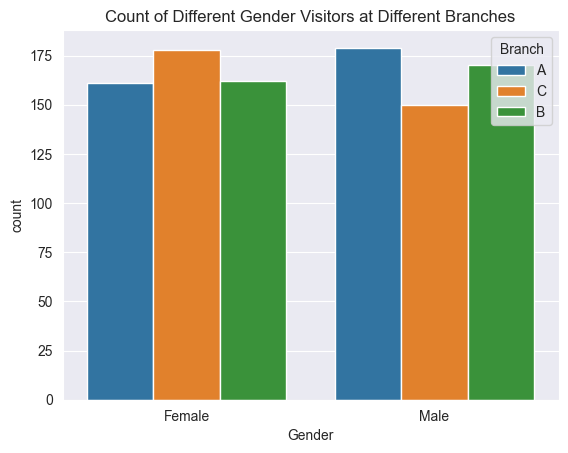

In [149]:
sns.set_style('darkgrid')
ax = sns.countplot(x=df['Gender'],data=df,hue=df['Branch'])
plt.xlabel('Gender')
plt.title('Count of Different Gender Visitors at Different Branches')
plt.legend(title='Branch',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Count Plot shows the Count of Different Gender visitors at Different Branches of Super Market.**
- **Here we can see that Branch A has the highest Male visitors and Branch C has the lowest Male visitors.**
- **And Branch C has the highest Female visitors and Branch A and B having the same amount of Female visitors.**

## Count of Different Types of Payment Methods used by Different Genders

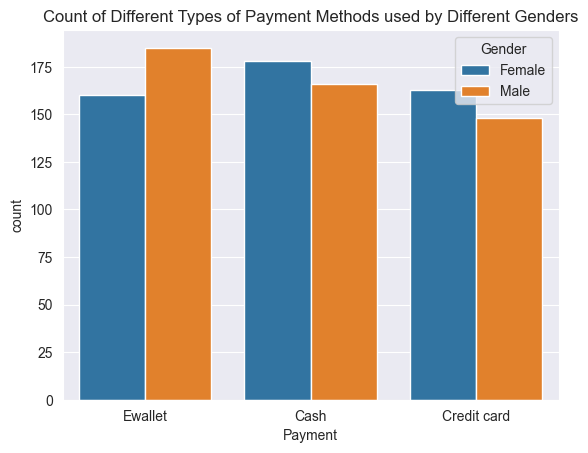

In [150]:
sns.set_style('darkgrid')
ax = sns.countplot(x=df['Payment'],data=df,hue=df['Gender'])
plt.xlabel('Payment')
plt.title('Count of Different Types of Payment Methods used by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Count Plot shows the Types of Payment Methods used by Different Genders i.e Male and Female.**
- **Here we can see that Ewallet is used mostly by Males and Cash Payment is used mostly by Females.**
- **And Credit Card being the lowest used Payment Method by Males and Ewallet being the lowest used Payment Method by Females.**

## Count of Different Gender Visitors from Different Cities

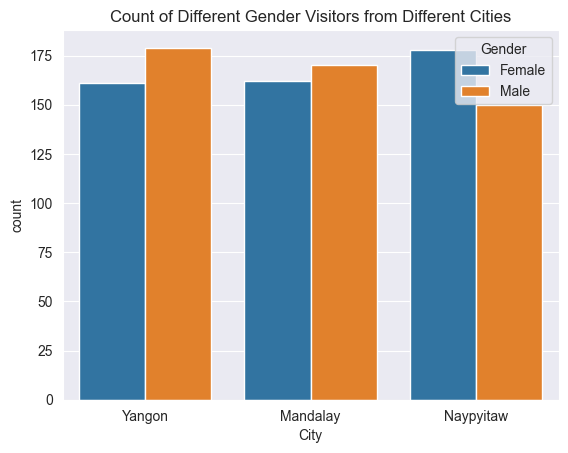

In [151]:
sns.set_style('darkgrid')
ax = sns.countplot(x=df['City'],data=df,order=df['City'].value_counts().index,hue=df['Gender'])
plt.xlabel('City')
plt.title('Count of Different Gender Visitors from Different Cities')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Count Plot shows the Count of Different Gender visitors i.e Male and Female from Different Cities.**
- **Here we can see that Most Female Customers came from Naypyitaw and Most Males Customers came from Yangon.**
- **And Lowest Number of Female Customers are from Yangon and Lowest Number of Male Customers are from Naypyitaw.**

## Quantity of Products Sold from Each Product Line

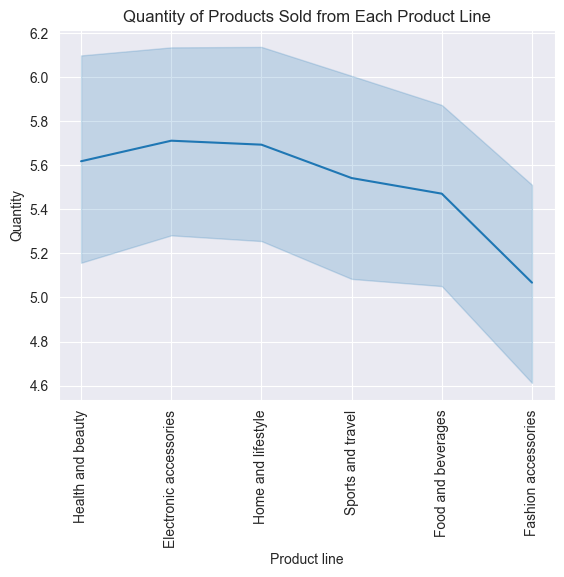

In [152]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=df['Product line'],y=df['Quantity'],data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Quantity of Products Sold from Each Product Line')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Line Plot shows the Quantity of Products Sold from Different Product Lines.**
- **Here we can see that Highest Selling Product Lines are Electronic Accessories and Home and Lifestyle.**
- **And Lowest Selling Product line being the Fashion Accessories.**

## Different Payment Methods Used by Different Cities

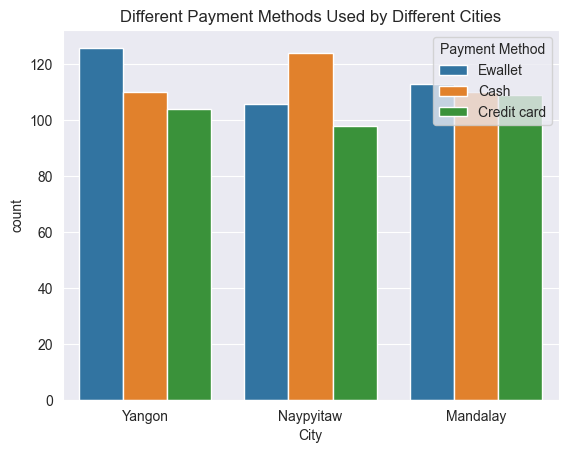

In [153]:
sns.set_style('darkgrid')
ax = sns.countplot(x=df['City'],data=df,hue=df['Payment'])
plt.legend(title='Payment Method',loc='upper right')
plt.title('Different Payment Methods Used by Different Cities')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Count Plot shows the Type of Payment Methods used by Customers of Different Cities.**
- **Here we can see that Ewallet Method is used mostly by Customers from Yangon City.**
- **And Cash Method is mostly used by Customers from Naypyitaw City.**
- **Finally Credit Card Method is mostly used by Customers from Mandalay City.**

## Total Amount Spend on Different Product Lines by Different Genders

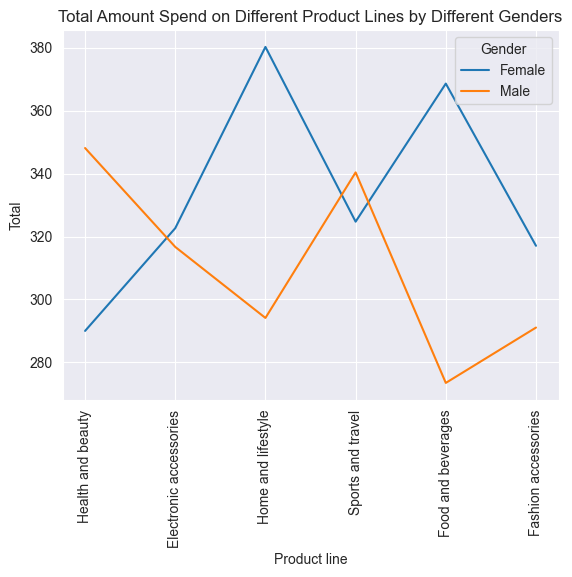

In [154]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=df['Product line'],y=df['Total'],data=df,hue=df['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Total Amount Spend on Different Product Lines by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Line Plot shows the Total Amount of Money spend by Different Gender Customers i.e Male and Female on Different Product Lines.**
- **Here we can see that Male spend most money on Health and Beauty Products and least money on Food and Beverage Products.**
- **And Female spend most money on Home and Lifestyle Products and least money on Health and Beauty Products.**

## Rating of Different Product Lines by Different Genders

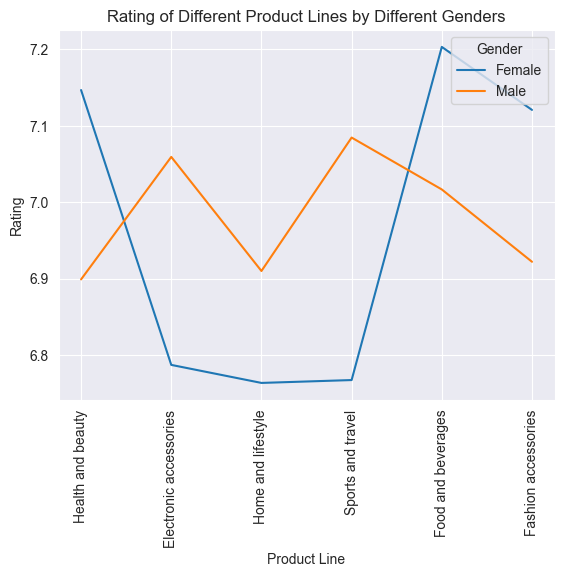

In [155]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=df['Product line'],y=df['Rating'],data=df,hue=df['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Rating of Different Product Lines by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Line Plot shows the Rating provided by Different Gender Customers i.e Male and Female on Different Product Lines.**
- **Here we can see that Female rated Food and Beverage Products the most followed by Health and Beauty Products.**
- **And Male rated Sports and Travel Products the most followed by Electronic Accessories Products.**

## Gross Income from Different Product Lines in Different Cities

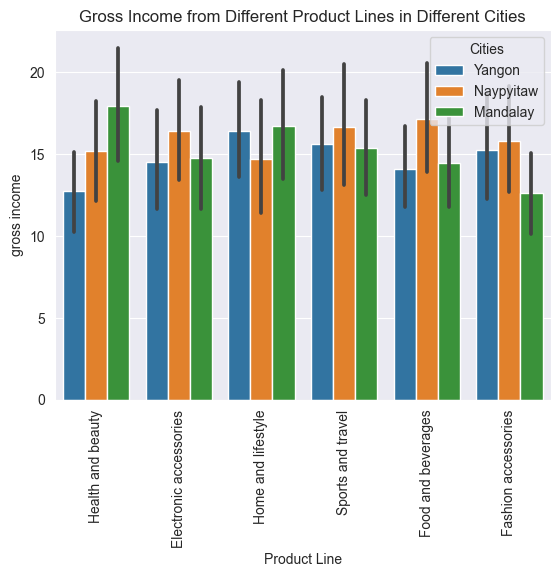

In [156]:
sns.set_style('darkgrid')
ax = sns.barplot(x=df['Product line'],y=df['gross income'],data=df,hue=df['City'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Gross Income from Different Product Lines in Different Cities')
plt.legend(title='Cities',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Bar Graph shows the Gross Income from Different Product Lines from Different Cities.**
- **Here we can see that Health and Beauty Products produce highest gross income in Mandalay City.**
- **And Electronic Accessories Products produce highest gross income in Naypyitaw City.**
- **And Home and Lifestyle Products produce highest gross income in Manndalay City.**
- **And Sports and Travel Products produce highest income in Naypyitaw City.**
- **And Food and Beverages Products produce highest income in Naypyitaw City.**
- **Finally Fashion Accessories Products produce highest income in Naypyitaw City.**

## Total Sale on Each Day for All Months

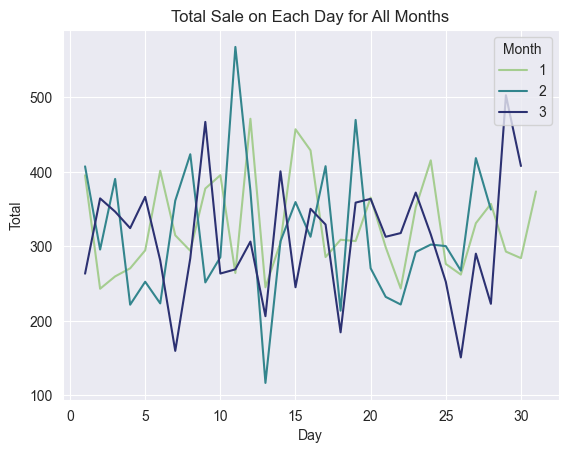

In [157]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=df['Day'],y=df['Total'],hue=df['Month'],err_style=None,palette='crest')
plt.legend(title='Month',loc='upper right')
plt.title('Total Sale on Each Day for All Months')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Line Plot shows the Total Sales in Super Market for each Day in 3 Months.**
- **Here we can see that in 1st Month between Day 10 and Day 15 we have the Highest and Lowest Sale Both.**
- **And in 2nd Month between Day 10 and Day 15 we have the Highest and Lowest Sale Both.**
- **Finally in 3rd Month between Day 25 and Day 30 we have the Highest Sale.**

## Taxes on Different Product Lines

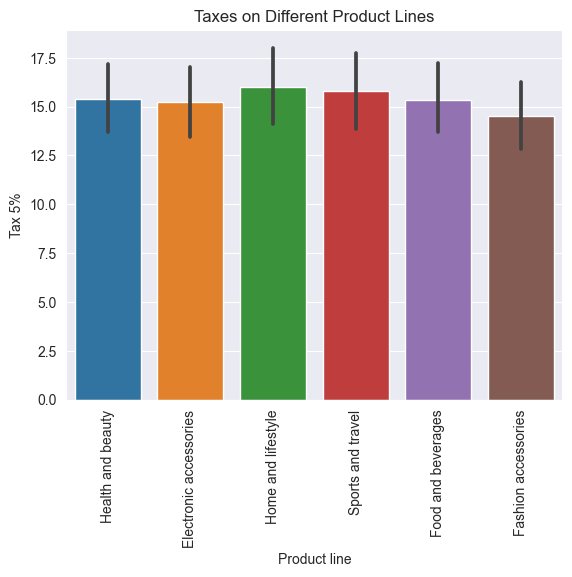

In [158]:
sns.set_style('darkgrid')
ax = sns.barplot(x=df['Product line'],data=df,y=df['Tax 5%'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Taxes on Different Product Lines')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Bar Plot shows the Amount of Taxes applied on Different Product Lines.**
- **Here we can see that Home and Lifestyle has the highest tax applied Product.**
- **And Fashion Accessories been the lowest tax applied Product.**

## Number of Products bought by Different Genders from Different Product Lines

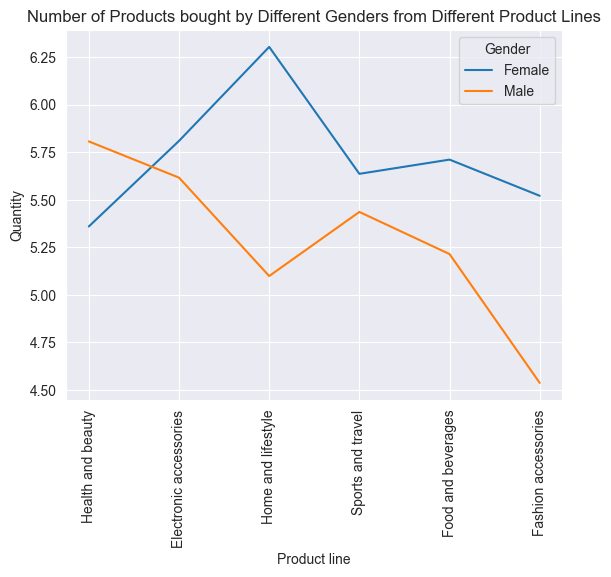

In [159]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=df['Product line'],y=df['Quantity'],data=df,hue=df['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Number of Products bought by Different Genders from Different Product Lines')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Line Plot shows the Number of Products bought by Different Genders i.e Male and Female from Different Product Lines.**
- **Here we can see that Male buy Health and Beauty Products most which is then followed by Electronics Accessories from Super Market.**
- **And Female buy Home and Lifestyle Products most which is then followed by Food and Beverages Products from the Super Market.**

## Total Gross Income from Different Branches by Different Genders

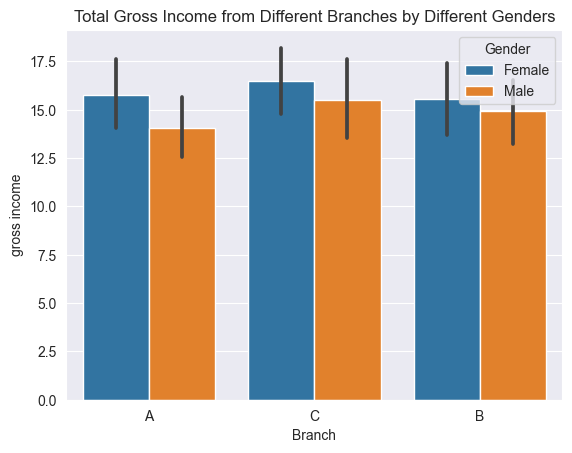

In [160]:
sns.set_style('darkgrid')
ax = sns.barplot(x=df['Branch'],y=df['gross income'],data=df,hue=df['Gender'])
plt.title('Total Gross Income from Different Branches by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

### 📍 Conclusion from Above Chart

- **Above Bar Plot shows the Total Gross Amount from Different Branches by Different Genders i.e Male and Female.**
- **Here we can see that Male and Female spend most of their money in Branch C of Super Market.**